In [2]:
import pandas as pd
import numpy as np
import bokeh as bk
from collections import Counter 
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("./golf_courses.csv",index_col=False,low_memory=False)
pd.set_option('display.max_columns', None)
df1.head()

,Name,Street,City,State,Zip1,Zip2,County,Email,Phone,Fax,Description,Public/Private,Year Built,Annual Rounds,Season,Manager,Club Pro,Superintendent,Guest Policy,Designer,Shop Hours,Dress Code,Fee Weekend,Fee Weekday,Tee Time Reservations,Online Reservations,Earliest Tee Time,Holes,Greens Type,Fairway Type,Water Hazards,Bunkers,Metal Spikes,Aeration,Fivesomes Alloweed
0,Albertville Golf & Country Club,Country Club Rd,Albertville,AL,35950,NaN,Marshall,NaN,256-878-4403,NaN,NaN,Private,1966.0,NaN,Open all year,Board of Directors,Board of Directors,Joe Baty,Closed,Leon Howard,9:00 AM / N/A,"No denim, collared shirt and bermuda shorts re...",$20.00,$20.00,N/A N/A,NaN,NaN,18,Bermuda Grass,Bermuda Grass,Yes,21-30,Allowed,April October,No Overseeding
1,Willow Brook Golf Course,134 Par Dr,Albertville,AL,35951,6165.0,Marshall,ncagle@charter.net,256-878-6766,256-878-6766,NaN,Public,1998.0,NaN,Open all year,Joe Cagle,NaN,Chris Hall,Open,Neal Cagle,Dawn / Dusk,No tank tops or cutoffs,$20.00,$15.00,N/A N/A,NaN,NaN,18,Tifdwarf Grass,Bermuda Grass,Yes,1-10,Not Allowed,May,November/OpenDecember/Open
2,Lakewinds Golf Course,95 County Rd 40,Alexander City,AL,35010,3142.0,Tallapoosa,NaN,256-825-9860,NaN,NaN,Public,1966.0,"30,000 (estimated)",Open all year,Bobby Cleveland,NaN,Randy Tate,Open,Willis Fuller,Dawn / Dusk,Shirt and shoes required,$10.00,$10.00,Accepted,No,7:30 AM,18,Bermuda Grass,Bermuda Grass,Yes,1-10,Not Allowed,Varies,October/Open
3,Willow Point Country Club,3054 Willow Point Rd,Alexander City,AL,35010,NaN,Tallapoosa,info@russelllands.com,256-212-1407,256-212-1440,NaN,Private,1961.0,"25,000 (estimated)",Open all year,Steve Lyle,Steve Lyle,Cole McInnis,Closed,Michael Hurdzan & Dana Fry,8:00 AM / 5:00 PM,"No denim, collared shirt and bermuda shorts re...",$101.00,$101.00,Accepted,No,8:00 AM,18,Bent Grass,Bermuda Grass,Yes,21-30,Allowed,May August,October/Open
4,Alpine Bay Golf Club,9855 Renfroe Rd,Alpine,AL,35014,6711.0,Talladega,NaN,256-268-2920,256-268-9410,NaN,Resort,1972.0,"30,000 (estimated)",Open all year (closed on Mondays),Jim Hanna,Shawn Reider,"Donald ""Buck"" Rutherford",Open,"Robert Trent Jones, Sr.",8:00 AM / 5:00 PM,"No denim, collared shirt and bermuda shorts re...",$34.00,$25.00,Accepted,No,8:00 AM,18,Bent Grass,Bermuda Grass,Yes,41-50,Not Allowed,March,September/Open


In [4]:
state = df1.State
count = Counter(state)
states, counts = list(count.keys()), list(count.values())
for state in states:
    assert counts[states.index(state)] == count[state]

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


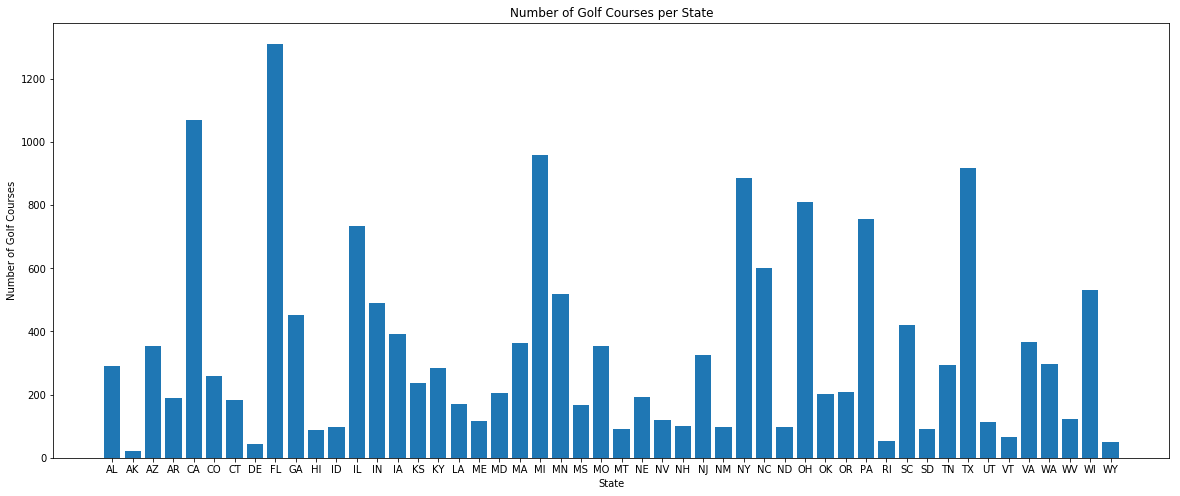

In [5]:
plt.figure(figsize =(20,8))
plt.bar(range(len(counts)), counts)
ax = plt.subplot()
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(states)
plt.xlabel('State')
plt.ylabel('Number of Golf Courses')
plt.title('Number of Golf Courses per State')
plt.show()

In [6]:
common = count.most_common()
states = [x[0] for x in common]
counts = [x[1] for x in common]
for state in states:
    assert counts[states.index(state)] == count[state]

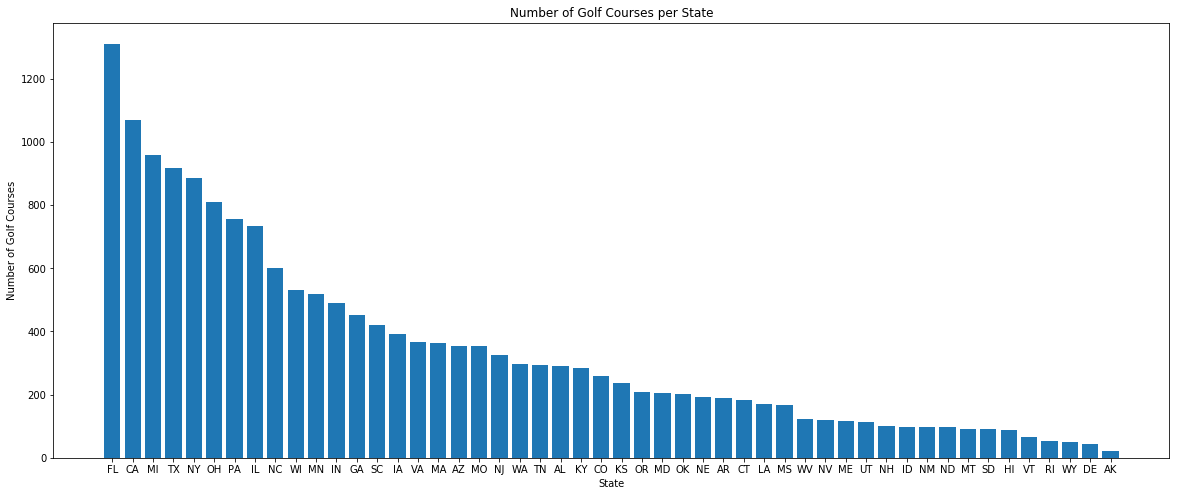

In [7]:
plt.figure(figsize =(20,8))
plt.bar(range(len(counts)), counts)
ax = plt.subplot()
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(states)
plt.xlabel('State')
plt.ylabel('Number of Golf Courses')
plt.title('Number of Golf Courses per State')
plt.show()

In [8]:
from bokeh.io import output_notebook, show, output_file
from bokeh.models import LogColorMapper
from bokeh.palettes import Reds9 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_states import data as statesData



palette.reverse()

states = {
    code: state for code, state in statesData.items() 
}

del states['DC']
del states['AK']
del states['HI']

state_xs = [state["lons"] for state in states.values()]
state_ys = [state["lats"] for state in states.values()]
names =[code for code in states.keys()]

state = df1.State
count = Counter(state)
counts = [count[name] for name in names]

color_mapper = LogColorMapper(palette=palette)

data=dict(
    x=state_xs,
    y=state_ys,
     name=names,
     count = counts
)

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Distribution of Golf Courses in America", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,plot_width=1100, plot_height=700,
     tooltips=[
          ("Name", "@name"),("Golf Courses:", "@count")
     ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
           fill_color={'field': 'count', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

output_notebook()
show(p)

Loading BokehJS ...

In [16]:
from bokeh.layouts import column, row, widgetbox
from bokeh.models import CustomJS, Slider, Toggle, Button
from bokeh.models import ColumnDataSource
from bokeh.palettes import Reds5 as palette
palette.reverse()
states = {
    code: state for code, state in statesData.items() 
}

del states['DC']
del states['AK']
del states['HI']

state_xs = [state["lons"] for state in states.values()]
state_ys = [state["lats"] for state in states.values()]
names =[code for code in states.keys()]
avg_costs = []

cost_data =df1[df1['Fee Weekday'].apply(lambda x: type(x)==str)]
cost_data['Fee Weekday'] = pd.Series([float(x[1:]) for x in cost_data['Fee Weekday']], index=cost_data.index)
cost_data['Cost Per Hole Weekday'] =  cost_data['Fee Weekday']/cost_data['Holes']
cost_data.head()

for name in names:
    courses = cost_data[cost_data.State == name]
    avg_costs.append(round(courses['Cost Per Hole Weekday'].mean(),2))
    
avg_costs_weekend = []

cost_data_weekend =df1[df1['Fee Weekend'].apply(lambda x: type(x)==str)]
cost_data_weekend['Fee Weekend'] = pd.Series([float(x[1:]) for x in cost_data_weekend['Fee Weekend']], index=cost_data_weekend.index)
cost_data_weekend['Cost Per Hole Weekend'] =  cost_data_weekend['Fee Weekend']/cost_data_weekend['Holes']
cost_data_weekend.head()

for name in names:
    courses = cost_data_weekend[cost_data_weekend.State == name]
    avg_costs_weekend.append(round(courses['Cost Per Hole Weekend'].mean(),2))

print(avg_costs_weekend)

color_mapper = LogColorMapper(palette=palette)
costs_dict = {
    '0':avg_costs,
    '1':avg_costs_weekend
        }

data=dict(
    x=state_xs,
    y=state_ys,
    name=names,
    avg_cost = avg_costs,
    **costs_dict
)
source = ColumnDataSource(data)
TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Avg Cost to Golf Per Hole in America", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,plot_width=1100, plot_height=700,
     tooltips=[
          ("Name", "@name"),("Average Cost Per Hole:", "@avg_cost{$0,0.00}")
     ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=source,
fill_color={'field': 'avg_cost', 'transform': color_mapper},
fill_alpha=0.7, line_color="white", line_width=0.5)

output_notebook()
#output_file('fees.html')
button = Button(label='Weekday')
callback = CustomJS(args=dict(source=source,button=button), code="""
        var data = source.data;
        if(button.label === 'Weekday'){
        button.label = 'Weekend'
        data['avg_cost'] = data['1']
        } else{
        button.label = 'Weekday'
        data['avg_cost'] = data['0']}
        source.change.emit();
    """)    

button.js_on_click(callback)
show(column(widgetbox(button),p))






slider = Slider(start=0, end=1, value=0, step=1, title="Weekday", show_value=False)


callback = CustomJS(args=dict(source=source,slider=slider), code="""
        var data = source.data;
        var v = cb_obj.value
        data['avg_cost'] = data[v]
        if(v==0){
        slider.title = 'Weekday'
        } else{
        slider.title = 'Weekend'}
        source.change.emit();
    """)    

slider.js_on_change('value',callback)
show(column(p,widgetbox(slider),))


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[5.02, 3.21, 1.83, 2.09, 1.67, 2.56, 1.54, 2.03, 2.64, 1.83, 2.47, 1.44, 1.56, 2.01, 1.66, 1.49, 1.87, 2.56, 2.45, 1.72, 1.79, 1.89, 2.09, 2.31, 1.91, 2.0, 2.41, 1.78, 1.43, 1.62, 1.65, 1.75, 2.32, 1.82, 1.65, 2.17, 2.01, 2.63, 1.64, 1.75, 1.98, 1.86, 2.17, 2.03, 2.83, 2.8, 1.59, 1.92]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Loading BokehJS ...

In [10]:
hole_count = Counter(df1.Holes)
holes, counts = list(hole_count.keys()), list(hole_count.values())
for hole in holes:
    assert counts[holes.index(hole)] == hole_count[hole]

limit = 4

if limit > 0 and limit < len(holes):
    others = sum(counts[limit:])
    holes = holes[0:limit]
    counts = counts [0:limit]

holes.append('Others')
counts.append(others)

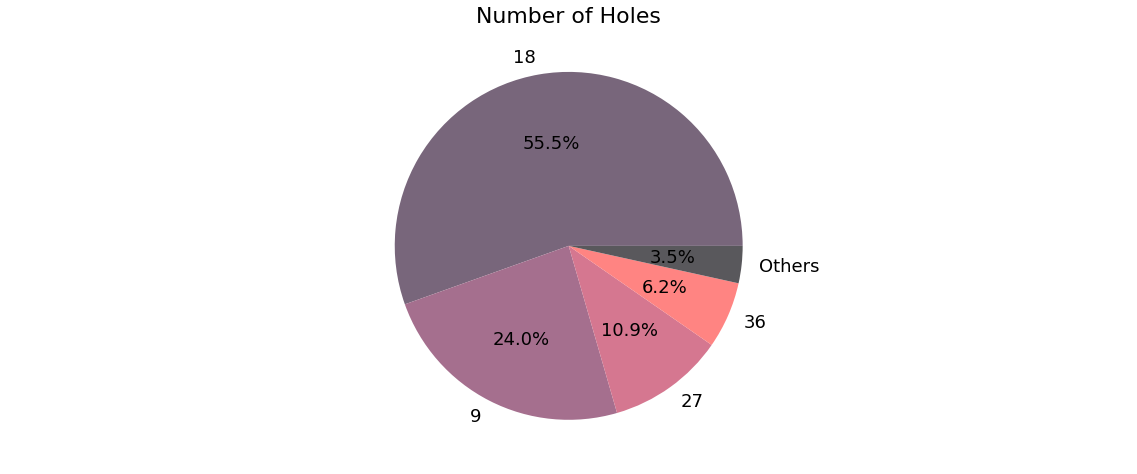

In [11]:
colors = ['#78667b','#a56f8e','#d57790', '#ff8482','#59585c']
plt.figure(figsize =(20,8))
plt.axis('equal')
plt.title('Number of Holes',fontsize=22)
plt.pie(counts,labels=holes,autopct='%0.1f%%',colors=colors,textprops={'fontsize': 18})
plt.show()

In [12]:
greens_count = Counter(df1['Greens Type'])
greens_common = greens_count.most_common()
greens = [x[0] for x in greens_common]
counts = [x[1] for x in greens_common]

for green in greens:
    assert counts[greens.index(green)] == greens_count[green]

limit = 4

if limit > 0 and limit < len(greens):
    others = sum(counts[limit:])
    greens = greens[0:limit]
    counts = counts [0:limit]

greens.append('Others')
counts.append(others)

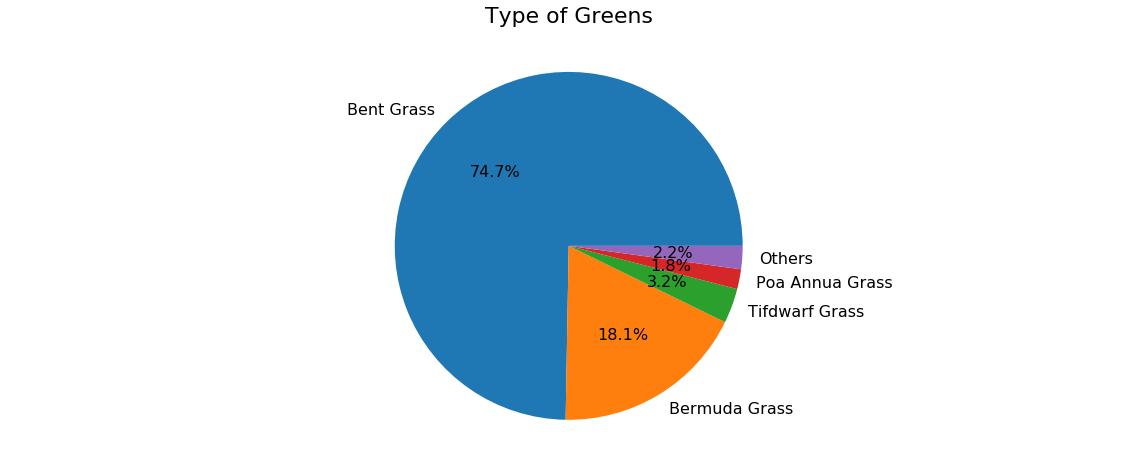

In [13]:
plt.figure(figsize =(20,8))
plt.axis('equal')
plt.title('Type of Greens',fontsize=22)
plt.pie(counts,labels=greens,autopct='%0.1f%%',textprops={'fontsize': 16})
plt.show()

In [14]:
fairways_count = Counter(df1['Fairway Type'])
fairways_common = fairways_count.most_common()
fairways = [x[0] for x in fairways_common]
counts = [x[1] for x in fairways_common]

for fairway in fairways:
    assert counts[fairways.index(fairway)] == fairways_count[fairway]

limit = 6

if limit > 0 and limit < len(fairways):
    others = sum(counts[limit:])
    fairways = fairways[0:limit]
    counts = counts [0:limit]


fairways.append('Others')
counts.append(others)

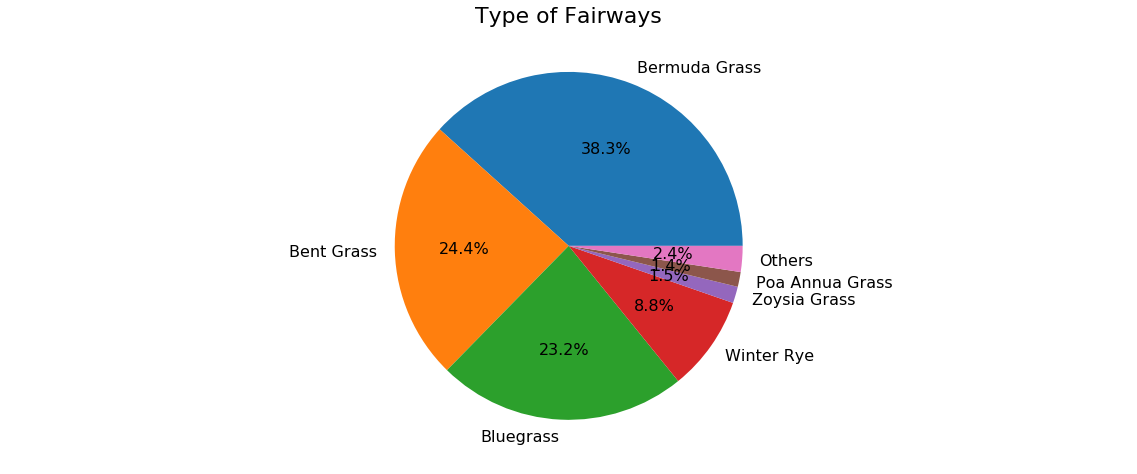

In [15]:
plt.figure(figsize =(20,8))
plt.axis('equal')
plt.title('Type of Fairways',fontsize=22)
plt.pie(counts,labels=fairways,autopct='%0.1f%%',textprops={'fontsize': 16})
plt.show()